# Importing the neccessary libraries

In [1]:
import pandas as pd
import os
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Checking directory and change into the datasets directory for analysis

In [2]:
os.getcwd()

'c:\\Users\\HongdingZhang\\OneDrive - Harnham Search and Selection Ltd\\airbnb_project\\AirBnB'

In [3]:
os.chdir('../datasets')

In [4]:
os.getcwd()

'c:\\Users\\HongdingZhang\\OneDrive - Harnham Search and Selection Ltd\\airbnb_project\\datasets'

In [5]:
os.listdir()

['cleaned_listing.csv', 'listings.csv.gz', 'reviews.csv.gz']

# Reading the  DataFrame 'listing'

In [6]:
listing = pd.read_csv('listings.csv.gz', compression = 'gzip')
listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240906025355,2024-09-11,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, France",NaN,NaN,NaN,67%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Observatoire,NaN,48.831910,2.318700,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$113.00,2,30,2,2,30,30,2.0,30.0,NaN,t,6,20,35,297,2024-09-11,4,0,0,2017-10-28,2019-10-24,5.00,5.00,5.00,5.00,5.00,5.00,5.00,7511409139079,t,1,1,0,0,0.05
1,5396,https://www.airbnb.com/rooms/5396,20240906025355,2024-09-13,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Paris, France",We have spent a lot of time traveling for work...,within an hour,100%,94%,NaN,https://a0.muscache.com/im/users/7903/profile_...,https://a0.muscache.com/im/users/7903/profile_...,Saint-Paul - Ile Saint-Louis,2.0,4.0,"['email', 'phone']",t,t,Neighborhood highlights,Hôtel-de-Ville,NaN,48.852470,2.358350,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Hot water"", ""Stove"", ""Fire extinguisher"", ""O...",$95.00,2,730,2,2,1125,1125,2.0,1125.0,NaN,t,3,24,54,77,2024-09-13,413,57,2,2009-06-30,2024-09-01,4.61,4.64,4.59,4.81,4.84,4.96,4.59,7510402838018,f,1,1,0,0,2.23
2,7397,https://www.airbnb.com/rooms/7397,20240906025355,2024-09-06,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,Franck,2008-08-30,"Paris, France","I am a writer,54, author of novels, books of l...",within an hour,100%,67%,t,https://a0.muscache.com/im/pictures/user/ad6a9...,https://a0.muscache.com/im/pictures/user/ad6a9...,Le Marais,1.0,10.0,"['email', 'phone']",t,t,NaN,Hôtel-de-Ville,NaN,48.859090,2.353150,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,1.0,"[""Host greets you"", ""Heating"", ""Refrigerator"",...",$145.00,10,130,2,10,130,130,9.9,130.0,NaN,t,6,30,49,316,2024-09-06,360,22,1,2011-04-08,2024-08-27,4.73,4.81,4.45,4.92,4.89,4.93,4.74,7510400829623,f,1,1,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20240906025355,2024-09-10,previous scrape,Sunny apartment with balcony,

# Specifing the columns we need (relevant column for the analysis)

In [7]:
Columns_str = "id, name, description, host_id, host_since, host_location, host_response_time, host_response_rate, neighbourhood_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, number_of_reviews, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable"

In [99]:
# Creating a list
column_lst = Columns_str.split(', ')
column_lst

['id',
 'name',
 'description',
 'host_id',
 'host_since',
 'host_location',
 'host_response_time',
 'host_response_rate',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable']

In [9]:
# Filtering the columns
listing = listing[column_lst]

# Checking for null values 

In [11]:
check_null = listing.isnull().sum()
print(check_null.to_string()) # to show all the columns

id                                 0
name                               0
description                     4076
host_id                            0
host_since                         6
host_location                  19554
host_response_time             41089
host_response_rate             41089
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                      31239
bathrooms_text                    90
bedrooms                        7405
beds                           31360
amenities                          0
price                          31231
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
review_scores_rating           27142
review_scores_accuracy         27154
review_scores_cleanliness      27151
review_scores_checkin          27161
r

# Dropping the 'description' column

In [12]:
listing = listing.drop('description', axis = 1)

## Dropping the rows with 'price' column as NaN

In [18]:
listing = listing.dropna(subset=['price'])

In [19]:
#checking the null values
check_null = listing.isnull().sum()
print(check_null.to_string()) 

id                                 0
name                               0
host_id                            0
host_since                         0
host_location                  14605
host_response_time             18501
host_response_rate             18501
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         20
bathrooms_text                    65
bedrooms                         123
beds                             141
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
review_scores_rating           18176
review_scores_accuracy         18178
review_scores_cleanliness      18177
review_scores_checkin          18180
review_scores_communication    18177
r

## Replace ‘host_location’ nulls with ‘no_location’

In [20]:
listing['host_location'] = listing['host_location'].fillna('no_location')

In [21]:
#checking the null values
check_null = listing.isnull().sum()
print(check_null.to_string())

id                                 0
name                               0
host_id                            0
host_since                         0
host_location                      0
host_response_time             18501
host_response_rate             18501
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         20
bathrooms_text                    65
bedrooms                         123
beds                             141
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
review_scores_rating           18176
review_scores_accuracy         18178
review_scores_cleanliness      18177
review_scores_checkin          18180
review_scores_communication    18177
r

## Replace ‘host_response_time’ with ‘no_data’

In [22]:
listing['host_response_time'] = listing['host_response_time'].fillna('no_data')

In [23]:
listing['host_response_rate'] = listing['host_response_rate'].fillna('no_data')

In [24]:
# Checking the null values
check_null = listing.isnull().sum()
print(check_null.to_string())

id                                 0
name                               0
host_id                            0
host_since                         0
host_location                      0
host_response_time                 0
host_response_rate                 0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         20
bathrooms_text                    65
bedrooms                         123
beds                             141
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
review_scores_rating           18176
review_scores_accuracy         18178
review_scores_cleanliness      18177
review_scores_checkin          18180
review_scores_communication    18177
r

## Dropping the NaN of the columns described below, they contain insignificant amount of NaN.

In [25]:
drop_nan_lst = ['bathrooms', 'bathrooms_text', 'bedrooms', 'beds']

In [26]:
for column in drop_nan_lst:
    listing.dropna(subset=column, inplace=True)

In [27]:
# Checking the null values
check_null = listing.isnull().sum()
print(check_null.to_string())

id                                 0
name                               0
host_id                            0
host_since                         0
host_location                      0
host_response_time                 0
host_response_rate                 0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bathrooms_text                     0
bedrooms                           0
beds                               0
amenities                          0
price                              0
minimum_nights                     0
maximum_nights                     0
number_of_reviews                  0
review_scores_rating           18027
review_scores_accuracy         18029
review_scores_cleanliness      18028
review_scores_checkin          18031
review_scores_communication    18028
r

# Checking what to do with review columns

In [37]:
listing[listing['reviaew_scores_rating'].isnull()].head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
4,241715,Big Cosy Appartement with 100 m2 Terrace in Paris,3342097,2012-08-22,"Paris, France",no_data,no_data,Buttes-Chaumont,48.893464,2.378341,Entire rental unit,Entire home/apt,6,1.0,1 bath,3.0,0.0,"[""Outdoor dining area"", ""Free parking on premi...",$450.00,5,120,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
8,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,2009-07-29,"New York, NY",no_data,no_data,Louvre,48.860060,2.348630,Entire rental unit,Entire home/apt,1,1.0,1 bath,1.0,1.0,"[""Wifi"", ""Kitchen"", ""Essentials"", ""Dedicated w...",$75.00,180,360,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
70,25450,PARIS 10eme Luxury 2 Bed Apartment,105570,2010-04-08,"Norwalk, CT",no_data,no_data,Entrepôt,48.870070,2.364420,Entire rental unit,Entire home/apt,6,2.5,2.5 baths,2.0,3.0,"[""Heating"", ""Kitchen"", ""Wifi"", ""Indoor firepla...",$320.00,365,730,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
76,29386,Lovely garden studio in Butte-aux-Cailles village,126361,2010-05-17,"Paris, France",no_data,no_data,Gobelins,48.827944,2.348952,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Outdoor dining area"", ""Outdoor furniture"", ""...",$80.00,2,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
341,420686,Sunny flat on canal de l'Ourcq,2092156,2012-04-08,"Paris, France",within a day,100%,Buttes-Chaumont,48.890770,2.382190,Private room in rental unit,Private room,2,1.5,1.5 shared baths,1.0,1.0,"[""Cooking basics"", ""Elevator"", ""Dishes and sil...",$220.00,3,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


# Chekcing if other review columns have null values if the 'number_of_reviews' column isn't 0

In [38]:
listing[(listing['number_of_reviews'] != 0) & (listing['review_scores_rating'].isnull())].head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


## Listing with no review will be dropped

In [39]:
listing = listing[listing['number_of_reviews'] != 0]

In [40]:
listing

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,3109,zen and calm,3631,2008-10-14,"Paris, France",no_data,no_data,Observatoire,48.831910,2.318700,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$113.00,2,30,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,2009-02-14,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.852470,2.358350,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Hot water"", ""Stove"", ""Fire extinguisher"", ""O...",$95.00,2,730,413,4.61,4.64,4.59,4.81,4.84,4.96,4.59,f
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,2008-08-30,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.859090,2.353150,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,1.0,"[""Host greets you"", ""Heating"", ""Refrigerator"",...",$145.00,10,130,360,4.73,4.81,4.45,4.92,4.89,4.93,4.74,f
9,9952,Paris petit coin douillet,33534,2009-08-24,"Paris, France",within an hour,100%,Popincourt,48.863730,2.370930,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Stove"", ""Coffee maker"", ""Oven"",...",$246.00,4,31,51,4.92,4.98,4.88,4.98,4.86,4.86,4.90,f
10,10586,Studio 7 Montmartre,37107,2009-09-08,"Paris, France",within a few hours,100%,Buttes-Montmartre,48.887000,2.345310,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,4.0,"[""Room-darkening shades"", ""Iron"", ""Essentials""...",$80.00,30,300,54,4.84,4.77,4.75,4.85,4.98,4.65,4.67,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,1237662352760899905,Eiffel Tower View Haussman Charm,501320970,2023-02-16,"Paris, France",within an hour,100%,Palais-Bourbon,48.857501,2.301778,Entire rental unit,Entire home/apt,4,1.0,0 baths,1.0,2.0,"[""Wifi"", ""Cooking basics"", ""Dedicated workspac...",$136.00,1,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f
95408,1234531585832409607,Magnifique appart cœur de Paris,599048568,2024-08-30,no_location,within an hour,100%,Panthéon,48.841905,2.351841,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Wifi"", ""Washer"", ""TV"", ""Kitchen"", ""Paid park...",$153.00,1,365,3,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f
95410,1236935838120106698,Chic Modern Duplex Adjacent to Musée d'Orsay &...,533798190,2023-08-25,no_location,within an hour,100%,Vaugirard,48.843688,2.309430,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Wifi"", ""Dedicated workspace"", ""Hot water"", ""...",$121.00,1,365,1,5.00,4.00,3.00,5.00,5.00,5.00,4.00,t
95429,1238201820642240481,little house in Paris center,15023801,2014-05-02,"Paris, France",within an hour,100%,Observatoire,48.836524,2.323823,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,1.0,"[""Lock on bedroom door"", ""Wifi"", ""Dedicated wo...",$80.00,3,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f


In [41]:
# Checking for null values
check_null = listing.isnull().sum()
print(check_null.to_string())

id                             0
name                           0
host_id                        0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         2
review_scores_cleanliness      1
review_scores_checkin          4
review_scores_communication    1
review_scores_location         3
review_scores_value            4
instant_bookable               0


# Removing the remaining null values

In [42]:
drop_lst = ['review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']

In [43]:
for column in drop_lst:
    listing = listing.dropna(subset=column)

In [44]:
# Checking on null values
check_null = listing.isnull().sum()
print(check_null.to_string())

id                             0
name                           0
host_id                        0
host_since                     0
host_location                  0
host_response_time             0
host_response_rate             0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0


In [45]:
# Overview of the cleaned dataset
listing.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,3109,zen and calm,3631,2008-10-14,"Paris, France",no_data,no_data,Observatoire,48.83191,2.31870,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",$113.00,2,30,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,2009-02-14,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.85247,2.35835,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Hot water"", ""Stove"", ""Fire extinguisher"", ""O...",$95.00,2,730,413,4.61,4.64,4.59,4.81,4.84,4.96,4.59,f
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,2008-08-30,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.85909,2.35315,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,1.0,"[""Host greets you"", ""Heating"", ""Refrigerator"",...",$145.00,10,130,360,4.73,4.81,4.45,4.92,4.89,4.93,4.74,f
9,9952,Paris petit coin douillet,33534,2009-08-24,"Paris, France",within an hour,100%,Popincourt,48.86373,2.37093,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Stove"", ""Coffee maker"", ""Oven"",...",$246.00,4,31,51,4.92,4.98,4.88,4.98,4.86,4.86,4.90,f
10,10586,Studio 7 Montmartre,37107,2009-09-08,"Paris, France",within a few hours,100%,Buttes-Montmartre,48.88700,2.34531,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,4.0,"[""Room-darkening shades"", ""Iron"", ""Essentials""...",$80.00,30,300,54,4.84,4.77,4.75,4.85,4.98,4.65,4.67,f


In [46]:
len(listing) # number of rows

45872

# Changing the data type of the 'price' column from strings to floats

In [100]:
type(listing['price'][0])

numpy.float64

In [ ]:
float(listing['price'][0][1:].replace(',',''))

In [ ]:
listing['price'] = listing['price'].apply(lambda x: float(x[1:].replace(',','')))

In [ ]:
type(listing['price'][0])

In [ ]:
listing['price']

# Saving the cleaned dataset as CSV 

In [47]:
os.getcwd()

'c:\\Users\\HongdingZhang\\OneDrive - Harnham Search and Selection Ltd\\airbnb_project\\datasets'

In [48]:
listing.to_csv('cleaned_listing.csv')

# Rudimentary Analysis and filering

## We have alot of reviews in the review dataset, to reduce the cost of chatgpi API and narrow down the scope we explored how to reduce the number of listing IDs.

### Looking at neighbourhoods

In [54]:
grouped = listing.groupby(['neighbourhood_cleansed']).agg({'id' : 'count'})
grouped

,id
neighbourhood_cleansed,
Batignolles-Monceau,2802
Bourse,1941
Buttes-Chaumont,2263
Buttes-Montmartre,4571
Entrepôt,3131
Gobelins,1460
Hôtel-de-Ville,1657
Louvre,1256
Luxembourg,1473


In [55]:
# Ranking by id and price
grouped = listing.groupby(['property_type']).agg({'id' : 'count', 'price' : 'mean'}).sort_values(by=(['id', 'price']), ascending = False)
grouped

,id,price
property_type,,
Entire rental unit,38429,212.751151
Private room in rental unit,2332,126.180961
Entire condo,1547,207.478345
Room in boutique hotel,618,296.482201
Entire loft,599,272.747913
Room in hotel,515,213.411650
Private room in bed and breakfast,336,117.738095
Entire home,261,470.432950
Entire serviced apartment,217,406.774194


In [56]:
# sorting by price only 
grouped = listing.groupby(['neighbourhood_cleansed']).agg({'price' : 'mean'}).sort_values(by=('price'), ascending = False)
grouped

,price
neighbourhood_cleansed,
Élysée,355.620963
Palais-Bourbon,332.384286
Luxembourg,300.680244
Louvre,285.128185
Passy,269.565635
Hôtel-de-Ville,259.624623
Bourse,243.253478
Temple,238.703736
Panthéon,232.061991


# Import visualisation libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

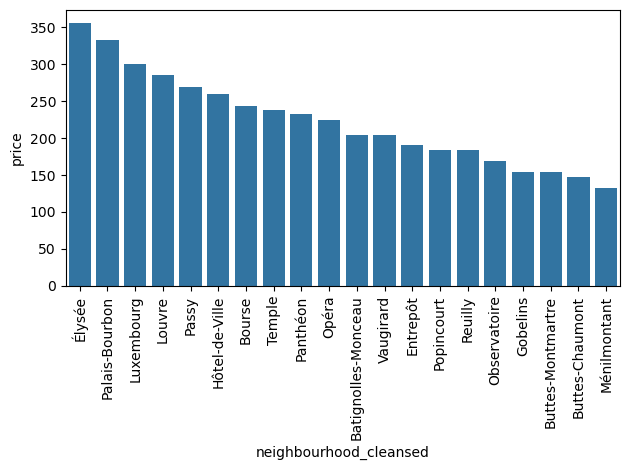

In [57]:
# visualising the findings
sns.barplot(x = 'neighbourhood_cleansed', y = 'price', data = grouped)
plt.xticks(rotation=90) #rotate the x axis names 
#plt.title('Crime Counts by Crime Type and Area')
#plt.gca().set(xlabel=None) #remove the x axis label 
plt.tight_layout()
plt.show() 



In [58]:
listing.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,3109,zen and calm,3631,2008-10-14,"Paris, France",no_data,no_data,Observatoire,48.83191,2.31870,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",113.0,2,30,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,2009-02-14,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.85247,2.35835,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Hot water"", ""Stove"", ""Fire extinguisher"", ""O...",95.0,2,730,413,4.61,4.64,4.59,4.81,4.84,4.96,4.59,f
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,2008-08-30,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.85909,2.35315,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,1.0,"[""Host greets you"", ""Heating"", ""Refrigerator"",...",145.0,10,130,360,4.73,4.81,4.45,4.92,4.89,4.93,4.74,f
9,9952,Paris petit coin douillet,33534,2009-08-24,"Paris, France",within an hour,100%,Popincourt,48.86373,2.37093,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Stove"", ""Coffee maker"", ""Oven"",...",246.0,4,31,51,4.92,4.98,4.88,4.98,4.86,4.86,4.90,f
10,10586,Studio 7 Montmartre,37107,2009-09-08,"Paris, France",within a few hours,100%,Buttes-Montmartre,48.88700,2.34531,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,4.0,"[""Room-darkening shades"", ""Iron"", ""Essentials""...",80.0,30,300,54,4.84,4.77,4.75,4.85,4.98,4.65,4.67,f


## Looking at property type

In [59]:
grouped_property = listing.groupby(['property_type', 'bedrooms']).agg({'price': 'mean'}).sort_values(by=('price'), ascending = False)
grouped_property

price
property_type               bedrooms             
Entire villa                2.0       4500.000000
                            1.0       3000.000000
Entire condo                5.0       2521.200000
Entire villa                3.0       2365.000000
Entire townhouse            5.0       2153.222222
...                                           ...
Farm stay                   1.0         61.000000
Private room in tiny home   2.0         59.000000
Shared room in hotel        1.0         46.785714
Shared room in condo        1.0         46.142857
Private room in rental unit 6.0         26.200000

[169 rows x 1 columns]

In [60]:
grouped_host_response_time = listing.groupby(['host_response_time']).agg({'review_scores_communication': 'mean'}).sort_values(by=('review_scores_communication'), ascending = False)
grouped_host_response_time

,review_scores_communication
host_response_time,
within a few hours,4.879592
within a day,4.826858
no_data,4.811341
within an hour,4.800168
a few days or more,4.788062


In [61]:
listing['property_type'].unique()

array(['Entire rental unit', 'Entire loft', 'Private room in rental unit',
       'Entire condo', 'Private room in guest suite', 'Entire home',
       'Entire guesthouse', 'Entire townhouse', 'Private room in condo',
       'Private room in bed and breakfast', 'Private room in loft',
       'Shared room in condo', 'Shared room in rental unit',
       'Entire serviced apartment', 'Private room in townhouse', 'Floor',
       'Room in bed and breakfast', 'Private room in guesthouse', 'Boat',
       'Entire villa', 'Entire guest suite', 'Private room in tiny home',
       'Entire place', 'Private room in home',
       'Private room in earthen home', 'Entire bed and breakfast',
       'Room in boutique hotel', 'Tiny home', 'Private room in villa',
       'Room in hotel', 'Private room', 'Shared room in loft',
       'Shared room in tiny home', 'Shared room in farm stay',
       'Private room in serviced apartment', 'Room in serviced apartment',
       'Entire vacation home', 'Shared room in

In [64]:
listing.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,3109,zen and calm,3631,2008-10-14,"Paris, France",no_data,no_data,Observatoire,48.83191,2.31870,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",113.0,2,30,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,2009-02-14,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.85247,2.35835,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Hot water"", ""Stove"", ""Fire extinguisher"", ""O...",95.0,2,730,413,4.61,4.64,4.59,4.81,4.84,4.96,4.59,f
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,2008-08-30,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.85909,2.35315,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,1.0,"[""Host greets you"", ""Heating"", ""Refrigerator"",...",145.0,10,130,360,4.73,4.81,4.45,4.92,4.89,4.93,4.74,f
9,9952,Paris petit coin douillet,33534,2009-08-24,"Paris, France",within an hour,100%,Popincourt,48.86373,2.37093,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Stove"", ""Coffee maker"", ""Oven"",...",246.0,4,31,51,4.92,4.98,4.88,4.98,4.86,4.86,4.90,f
10,10586,Studio 7 Montmartre,37107,2009-09-08,"Paris, France",within a few hours,100%,Buttes-Montmartre,48.88700,2.34531,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,4.0,"[""Room-darkening shades"", ""Iron"", ""Essentials""...",80.0,30,300,54,4.84,4.77,4.75,4.85,4.98,4.65,4.67,f


## Looking at neighbourhood with count of listing, price and review score

In [80]:
listing.groupby('neighbourhood_cleansed').agg({'id':'count', 'price':'mean', 'review_scores_rating':'mean'}).sort_values(by=['id', 'price'], ascending=False)

,id,price,review_scores_rating
neighbourhood_cleansed,,,
Buttes-Montmartre,4571,153.795450,4.737051
Popincourt,3937,183.349505,4.737313
Vaugirard,3686,203.602008,4.707398
Entrepôt,3131,190.138614,4.720600
Passy,2811,269.565635,4.705443
Batignolles-Monceau,2802,204.536403,4.709076
Opéra,2361,224.282931,4.715303
Temple,2329,238.703736,4.695827
Buttes-Chaumont,2263,147.669023,4.742209


## We can potentially filering the list id by the df above, with the top 10 property types

In [75]:
top_10_count_price_property_type = list(listing.groupby('property_type').agg({'id':'count', 'price':'mean'}).sort_values(by=['id', 'price'], ascending=False).reset_index().head(10)['property_type'])
top_10_count_price_property_type

['Entire rental unit',
 'Private room in rental unit',
 'Entire condo',
 'Room in boutique hotel',
 'Entire loft',
 'Room in hotel',
 'Private room in bed and breakfast',
 'Entire home',
 'Entire serviced apartment',
 'Private room in condo']

In [76]:
listing_filered_by_top_10_count_price_property_type = listing[listing['property_type'].isin(top_10_count_price_property_type)]
listing_filered_by_top_10_count_price_property_type

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,3109,zen and calm,3631,2008-10-14,"Paris, France",no_data,no_data,Observatoire,48.831910,2.318700,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",113.0,2,30,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,2009-02-14,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.852470,2.358350,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Hot water"", ""Stove"", ""Fire extinguisher"", ""O...",95.0,2,730,413,4.61,4.64,4.59,4.81,4.84,4.96,4.59,f
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,2008-08-30,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.859090,2.353150,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,1.0,"[""Host greets you"", ""Heating"", ""Refrigerator"",...",145.0,10,130,360,4.73,4.81,4.45,4.92,4.89,4.93,4.74,f
9,9952,Paris petit coin douillet,33534,2009-08-24,"Paris, France",within an hour,100%,Popincourt,48.863730,2.370930,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Stove"", ""Coffee maker"", ""Oven"",...",246.0,4,31,51,4.92,4.98,4.88,4.98,4.86,4.86,4.90,f
10,10586,Studio 7 Montmartre,37107,2009-09-08,"Paris, France",within a few hours,100%,Buttes-Montmartre,48.887000,2.345310,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,4.0,"[""Room-darkening shades"", ""Iron"", ""Essentials""...",80.0,30,300,54,4.84,4.77,4.75,4.85,4.98,4.65,4.67,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95403,1237662352760899905,Eiffel Tower View Haussman Charm,501320970,2023-02-16,"Paris, France",within an hour,100%,Palais-Bourbon,48.857501,2.301778,Entire rental unit,Entire home/apt,4,1.0,0 baths,1.0,2.0,"[""Wifi"", ""Cooking basics"", ""Dedicated workspac...",136.0,1,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f
95408,1234531585832409607,Magnifique appart cœur de Paris,599048568,2024-08-30,no_location,within an hour,100%,Panthéon,48.841905,2.351841,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Wifi"", ""Washer"", ""TV"", ""Kitchen"", ""Paid park...",153.0,1,365,3,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f
95410,1236935838120106698,Chic Modern Duplex Adjacent to Musée d'Orsay &...,533798190,2023-08-25,no_location,within an hour,100%,Vaugirard,48.843688,2.309430,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Wifi"", ""Dedicated workspace"", ""Hot water"", ""...",121.0,1,365,1,5.00,4.00,3.00,5.00,5.00,5.00,4.00,t
95429,1238201820642240481,little house in Paris center,15023801,2014-05-02,"Paris, France",within an hour,100%,Observatoire,48.836524,2.323823,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,1.0,"[""Lock on bedroom door"", ""Wifi"", ""Dedicated wo...",80.0,3,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f


## Looking into how many bedrooms are optimal

In [83]:
listing.groupby(['bedrooms','room_type']).agg({'id':'count', 'price':'mean', 'review_scores_rating':'mean'}).sort_values(by=['id', 'price'], ascending=False)

,,id,price,review_scores_rating
bedrooms,room_type,,,
1.0,Entire home/apt,24115,166.176073,4.720572
2.0,Entire home/apt,8236,292.969160,4.738991
0.0,Entire home/apt,5279,130.779693,4.625454
1.0,Private room,3486,151.648881,4.721807
3.0,Entire home/apt,2859,448.213012,4.763722
4.0,Entire home/apt,688,607.002907,4.779404
1.0,Hotel room,359,264.593315,4.601114
2.0,Private room,283,233.392226,4.749364
1.0,Shared room,169,101.201183,4.562604


In [84]:
listing['price'].mean()

212.62632978723406

## The review data has over 1.9 million rows of data, to keep the ChatGPT API cost cheap, we will filter the df using the following:
### as the client care about the property appriciation, let's look into the yearly property value change for each Arrondissement, with data based from the last 10 years, and for apartments/flats with 2 bedrooms.

In [85]:
paris_prices_dict = {
    "1st Arronadissement": [11000, 11300, 11600, 11900, 12300, 12700, 13000, 13200, 13500, 13600],
    "2nd Arrondissement": [9500, 9700, 9900, 10100, 10500, 10900, 11200, 11300, 11400, 11500],
    "3rd Arrondissement": [10000, 10200, 10400, 10800, 11100, 11400, 11800, 12000, 12200, 12300],
    "4th Arrondissement": [11500, 11800, 12100, 12400, 12700, 13000, 13300, 13500, 13700, 13800],
    "5th Arrondissement": [12000, 12300, 12600, 12900, 13200, 13600, 13800, 14000, 14200, 14300],
    "6th Arrondissement": [13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 16800, 17000],
    "7th Arrondissement": [12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000],
    "8th Arrondissement": [11500, 11800, 12200, 12600, 13000, 13400, 13800, 14200, 14500, 14600],
    "9th Arrondissement": [9800, 10000, 10200, 10400, 10700, 11100, 11400, 11600, 11800, 12000],
    "10th Arrondissement": [9000, 9200, 9400, 9600, 9800, 10200, 10600, 10800, 11000, 11200],
    "11th Arrondissement": [8800, 9100, 9400, 9700, 10000, 10300, 10600, 10800, 11000, 11200],
    "12th Arrondissement": [8700, 9000, 9300, 9600, 9900, 10200, 10500, 10700, 10900, 11100],
    "13th Arrondissement": [8300, 8500, 8700, 9000, 9300, 9600, 9900, 10100, 10300, 10500],
    "14th Arrondissement": [9100, 9400, 9600, 9900, 10200, 10500, 10800, 11000, 11200, 11400],
    "15th Arrondissement": [9800, 10000, 10300, 10600, 10900, 11200, 11500, 11800, 12100, 12300],
    "16th Arrondissement": [11000, 11300, 11600, 11900, 12200, 12600, 13000, 13300, 13600, 13800],
    "17th Arrondissement": [10500, 10800, 11100, 11400, 11700, 12000, 12300, 12500, 12700, 12800],
    "18th Arrondissement": [8200, 8500, 8800, 9100, 9400, 9700, 10000, 10200, 10400, 10500],
    "19th Arrondissement": [7500, 7800, 8000, 8300, 8600, 8900, 9200, 9400, 9600, 9800],
    "20th Arrondissement": [7900, 8100, 8300, 8600, 8900, 9200, 9500, 9700, 9900, 10000]
}

# List of years
years = list(range(2014, 2024))

# Creating the DataFrame
df_paris_prices = pd.DataFrame(paris_prices_dict, index=years)

In [86]:
df_paris_prices

,1st Arronadissement,2nd Arrondissement,3rd Arrondissement,4th Arrondissement,5th Arrondissement,6th Arrondissement,7th Arrondissement,8th Arrondissement,9th Arrondissement,10th Arrondissement,11th Arrondissement,12th Arrondissement,13th Arrondissement,14th Arrondissement,15th Arrondissement,16th Arrondissement,17th Arrondissement,18th Arrondissement,19th Arrondissement,20th Arrondissement
2014,11000,9500,10000,11500,12000,13000,12500,11500,9800,9000,8800,8700,8300,9100,9800,11000,10500,8200,7500,7900
2015,11300,9700,10200,11800,12300,13500,13000,11800,10000,9200,9100,9000,8500,9400,10000,11300,10800,8500,7800,8100
2016,11600,9900,10400,12100,12600,14000,13500,12200,10200,9400,9400,9300,8700,9600,10300,11600,11100,8800,8000,8300
2017,11900,10100,10800,12400,12900,14500,14000,12600,10400,9600,9700,9600,9000,9900,10600,11900,11400,9100,8300,8600
2018,12300,10500,11100,12700,13200,15000,14500,13000,10700,9800,10000,9900,9300,10200,10900,12200,11700,9400,8600,8900
2019,12700,10900,11400,13000,13600,15500,15000,13400,11100,10200,10300,10200,9600,10500,11200,12600,12000,9700,8900,9200
2020,13000,11200,11800,13300,13800,16000,15500,13800,11400,10600,10600,10500,9900,10800,11500,13000,12300,10000,9200,9500
2021,13200,11300,12000,13500,14000,16500,16000,14200,11600,10800,10800,10700,10100,11000,11800,13300,12500,10200,9400,9700
2022,13500,11400,12200,13700,14200,16800,16500,14500,11800,11000,11000,10900,10300,11200,12100,13600,12700,10400,9600,9900
2023,13600,11500,12300,13800,14300,17000,17000,14600,12000,11200,11200,11100,10500,11400,12300,13800,12800,10500,9800,10000


## Calculating the percentage change

In [89]:
df_percentage_change_dict = df_paris_prices.pct_change() * 100
df_percentage_change_dict = df_percentage_change_dict.reset_index()
df_percentage_change_dict

,index,1st Arronadissement,2nd Arrondissement,3rd Arrondissement,4th Arrondissement,5th Arrondissement,6th Arrondissement,7th Arrondissement,8th Arrondissement,9th Arrondissement,10th Arrondissement,11th Arrondissement,12th Arrondissement,13th Arrondissement,14th Arrondissement,15th Arrondissement,16th Arrondissement,17th Arrondissement,18th Arrondissement,19th Arrondissement,20th Arrondissement
0,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,2.727273,2.105263,2.000000,2.608696,2.500000,3.846154,4.000000,2.608696,2.040816,2.222222,3.409091,3.448276,2.409639,3.296703,2.040816,2.727273,2.857143,3.658537,4.000000,2.531646
2,2016,2.654867,2.061856,1.960784,2.542373,2.439024,3.703704,3.846154,3.389831,2.000000,2.173913,3.296703,3.333333,2.352941,2.127660,3.000000,2.654867,2.777778,3.529412,2.564103,2.469136
3,2017,2.586207,2.020202,3.846154,2.479339,2.380952,3.571429,3.703704,3.278689,1.960784,2.127660,3.191489,3.225806,3.448276,3.125000,2.912621,2.586207,2.702703,3.409091,3.750000,3.614458
4,2018,3.361345,3.960396,2.777778,2.419355,2.325581,3.448276,3.571429,3.174603,2.884615,2.083333,3.092784,3.125000,3.333333,3.030303,2.830189,2.521008,2.631579,3.296703,3.614458,3.488372
5,2019,3.252033,3.809524,2.702703,2.362205,3.030303,3.333333,3.448276,3.076923,3.738318,4.081633,3.000000,3.030303,3.225806,2.941176,2.752294,3.278689,2.564103,3.191489,3.488372,3.370787
6,2020,2.362205,2.752294,3.508772,2.307692,1.470588,3.225806,3.333333,2.985075,2.702703,3.921569,2.912621,2.941176,3.125000,2.857143,2.678571,3.174603,2.500000,3.092784,3.370787,3.260870
7,2021,1.538462,0.892857,1.694915,1.503759,1.449275,3.125000,3.225806,2.898551,1.754386,1.886792,1.886792,1.904762,2.020202,1.851852,2.608696,2.307692,1.626016,2.000000,2.173913,2.105263
8,2022,2.272727,0.884956,1.666667,1.481481,1.428571,1.818182,3.125000,2.112676,1.724138,1.851852,1.851852,1.869159,1.980198,1.818182,2.542373,2.255639,1.600000,1.960784,2.127660,2.061856
9,2023,0.740741,0.877193,0.819672,0.729927,0.704225,1.190476,3.030303,0.689655,1.694915,1.818182,1.818182,1.834862,1.941748,1.785714,1.652893,1.470588,0.787402,0.961538,2.083333,1.010101


## remove the 2014 row

In [90]:
df_percentage_change_dict = df_percentage_change_dict.drop(df_percentage_change_dict[df_percentage_change_dict['index'] == 2014].index)
df_percentage_change_dict

,index,1st Arronadissement,2nd Arrondissement,3rd Arrondissement,4th Arrondissement,5th Arrondissement,6th Arrondissement,7th Arrondissement,8th Arrondissement,9th Arrondissement,10th Arrondissement,11th Arrondissement,12th Arrondissement,13th Arrondissement,14th Arrondissement,15th Arrondissement,16th Arrondissement,17th Arrondissement,18th Arrondissement,19th Arrondissement,20th Arrondissement
1,2015,2.727273,2.105263,2.000000,2.608696,2.500000,3.846154,4.000000,2.608696,2.040816,2.222222,3.409091,3.448276,2.409639,3.296703,2.040816,2.727273,2.857143,3.658537,4.000000,2.531646
2,2016,2.654867,2.061856,1.960784,2.542373,2.439024,3.703704,3.846154,3.389831,2.000000,2.173913,3.296703,3.333333,2.352941,2.127660,3.000000,2.654867,2.777778,3.529412,2.564103,2.469136
3,2017,2.586207,2.020202,3.846154,2.479339,2.380952,3.571429,3.703704,3.278689,1.960784,2.127660,3.191489,3.225806,3.448276,3.125000,2.912621,2.586207,2.702703,3.409091,3.750000,3.614458
4,2018,3.361345,3.960396,2.777778,2.419355,2.325581,3.448276,3.571429,3.174603,2.884615,2.083333,3.092784,3.125000,3.333333,3.030303,2.830189,2.521008,2.631579,3.296703,3.614458,3.488372
5,2019,3.252033,3.809524,2.702703,2.362205,3.030303,3.333333,3.448276,3.076923,3.738318,4.081633,3.000000,3.030303,3.225806,2.941176,2.752294,3.278689,2.564103,3.191489,3.488372,3.370787
6,2020,2.362205,2.752294,3.508772,2.307692,1.470588,3.225806,3.333333,2.985075,2.702703,3.921569,2.912621,2.941176,3.125000,2.857143,2.678571,3.174603,2.500000,3.092784,3.370787,3.260870
7,2021,1.538462,0.892857,1.694915,1.503759,1.449275,3.125000,3.225806,2.898551,1.754386,1.886792,1.886792,1.904762,2.020202,1.851852,2.608696,2.307692,1.626016,2.000000,2.173913,2.105263
8,2022,2.272727,0.884956,1.666667,1.481481,1.428571,1.818182,3.125000,2.112676,1.724138,1.851852,1.851852,1.869159,1.980198,1.818182,2.542373,2.255639,1.600000,1.960784,2.127660,2.061856
9,2023,0.740741,0.877193,0.819672,0.729927,0.704225,1.190476,3.030303,0.689655,1.694915,1.818182,1.818182,1.834862,1.941748,1.785714,1.652893,1.470588,0.787402,0.961538,2.083333,1.010101


In [91]:
df_melted = pd.melt(df_percentage_change_dict, id_vars="index", var_name="Arrondissement", value_name="Percentage Change")
df_melted

,index,Arrondissement,Percentage Change
0,2015,1st Arronadissement,2.727273
1,2016,1st Arronadissement,2.654867
2,2017,1st Arronadissement,2.586207
3,2018,1st Arronadissement,3.361345
4,2019,1st Arronadissement,3.252033
...,...,...,...
175,2019,20th Arrondissement,3.370787
176,2020,20th Arrondissement,3.260870
177,2021,20th Arrondissement,2.105263
178,2022,20th Arrondissement,2.061856


In [92]:
df_melted.groupby('Arrondissement').agg({'Percentage Change':'mean'}).sort_values(by='Percentage Change', ascending=False).reset_index()

,Arrondissement,Percentage Change
0,7th Arrondissement,3.476001
1,6th Arrondissement,3.029151
2,19th Arrondissement,3.019181
3,18th Arrondissement,2.788926
4,12th Arrondissement,2.745853
5,11th Arrondissement,2.717724
6,8th Arrondissement,2.690522
7,20th Arrondissement,2.656943
8,13th Arrondissement,2.648571
9,15th Arrondissement,2.557606


## filering the listing df by the 7th Arrondissement: Palais-Bourbon


In [93]:
listing.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,3109,zen and calm,3631,2008-10-14,"Paris, France",no_data,no_data,Observatoire,48.83191,2.31870,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",113.0,2,30,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
1,5396,Your perfect Paris studio on Île Saint-Louis,7903,2009-02-14,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.85247,2.35835,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Hot water"", ""Stove"", ""Fire extinguisher"", ""O...",95.0,2,730,413,4.61,4.64,4.59,4.81,4.84,4.96,4.59,f
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,2008-08-30,"Paris, France",within an hour,100%,Hôtel-de-Ville,48.85909,2.35315,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,1.0,"[""Host greets you"", ""Heating"", ""Refrigerator"",...",145.0,10,130,360,4.73,4.81,4.45,4.92,4.89,4.93,4.74,f
9,9952,Paris petit coin douillet,33534,2009-08-24,"Paris, France",within an hour,100%,Popincourt,48.86373,2.37093,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Stove"", ""Coffee maker"", ""Oven"",...",246.0,4,31,51,4.92,4.98,4.88,4.98,4.86,4.86,4.90,f
10,10586,Studio 7 Montmartre,37107,2009-09-08,"Paris, France",within a few hours,100%,Buttes-Montmartre,48.88700,2.34531,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,4.0,"[""Room-darkening shades"", ""Iron"", ""Essentials""...",80.0,30,300,54,4.84,4.77,4.75,4.85,4.98,4.65,4.67,f


In [95]:
arr_7_df = listing[listing['neighbourhood_cleansed'] == 'Palais-Bourbon']
arr_7_df

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
84,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.60,4.57,4.75,4.81,4.74,4.91,4.55,f
87,35065,Lovely Loft Saint-Germain des Pres,150876,2010-06-23,"Paris, France",within a day,86%,Palais-Bourbon,48.852840,2.325170,Entire rental unit,Entire home/apt,2,1.5,1.5 baths,1.0,1.0,"[""Cooking basics"", ""Dishes and silverware"", ""P...",270.0,1,5,879,4.71,4.78,4.63,4.81,4.79,4.94,4.65,f
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
205,219447,Appartement calme : Eiffel Tower- une chambre,579988,2011-05-11,"Paris, France",no_data,no_data,Palais-Bourbon,48.860520,2.307640,Private room in rental unit,Private room,2,2.0,2 baths,2.0,4.0,"[""Elevator"", ""TV with standard cable"", ""Self c...",300.0,2,60,1,5.00,4.00,4.00,5.00,5.00,5.00,5.00,f
264,484126,Apartment with terrace Paris 07,2396369,2012-05-17,"Paris, France",no_data,no_data,Palais-Bourbon,48.852780,2.318740,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Room-darkening shades"", ""Cooking basics"", ""E...",486.0,3,60,29,4.96,5.00,4.97,4.97,4.97,4.97,4.79,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94724,1222246732366936452,A Fancy 1-BR with Services on the Champ-de-Mars,572796284,2024-04-17,no_location,within an hour,100%,Palais-Bourbon,48.857387,2.301658,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Pack \u2019n play/Travel crib - always at th...",263.0,2,1125,1,5.00,5.00,5.00,5.00,4.00,5.00,5.00,t
94846,1223076806224850492,a 2 pas de la tour Eiffel.,511505443,2023-04-24,"Paris, France",within an hour,100%,Palais-Bourbon,48.860569,2.309249,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Kitchen"", ""Bed linens"", ""D...",225.0,2,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
95000,1228200111947679995,"1579: Eiffel Tower Gem, Stylish & Unique",464019948,2022-06-13,"Paris, France",no_data,no_data,Palais-Bourbon,48.856760,2.301990,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Wifi"", ""Cooking basics"", ""Dedicated workspac...",184.0,2,22,1,4.00,4.00,5.00,5.00,5.00,5.00,5.00,t
95064,1228867541766808279,Appartement prestige proche Tour Eiffel -par L...,532452446,2023-08-17,no_location,within a few hours,100%,Palais-Bourbon,48.859614,2.308261,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""Smoke alar...",171.0,2,365,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t


In [97]:
os.getcwd()

'c:\\Users\\HongdingZhang\\OneDrive - Harnham Search and Selection Ltd\\airbnb_project\\datasets'

# Save df as csv

In [98]:
arr_7_df.to_csv('arr_7_df.csv')